## Step 13: Box and Whiskers graphs after removal of outliers

In this notebook, we perform an analysis of the dataset involving correlation and removal of outliers. We'll go through each stage in detail to understand the implementation, the theory, and the results.

## Step 1: Import Libraries and Classes

We import all the required libraries and custom classes for this analysis:
- `pandas` and `numpy`: For data handling and numerical computations.
- `matplotlib` and `plotly`: For visualizing the data.
- Custom classes (`DataTransform`, `DataFrameInfo`, `DataFrameTransform`, `Plotter`): These classes handle various specific tasks like data transformation, visualization, and displaying data information.

In [1]:
## Step 1: Import Libraries and Classes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from b_class_data_transform import DataTransform
from b_class_data_frame_info import DataFrameInfo
from b_class_data_frame_transform import DataFrameTransform
from b_class_plotter import Plotter

## Step 2: Load the Dataset
We load the dataset using `pandas` from the CSV file named `'tranformed_loan_data.csv'`:
- The dataset contains loan-related information that we will analyze.
- Loading the dataset is the first critical step for conducting any data analysis or cleaning tasks.

In [2]:
# Load the dataset
file_path = 'b_df_3_encoded_loan_data.csv'  # Make sure this file is accessible in the same directory or update the path accordingly
df = pd.read_csv(file_path)

## Step 3: Display Dataset Information
We use the following commands to inspect the dataset:
- `df.info()`: Provides a summary of the dataset, such as data types, number of non-null values, and memory usage.
- `df.head()`: Displays the first few rows of the dataset to give an initial overview of its structure and content.

In [3]:
# Display basic information about the dataset, including column names and data types

df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           54231 non-null  int64  
 1   member_id                    54231 non-null  int64  
 2   loan_amount                  54231 non-null  int64  
 3   funded_amount                54231 non-null  float64
 4   funded_amount_inv            54231 non-null  float64
 5   term                         54231 non-null  float64
 6   int_rate                     54231 non-null  float64
 7   instalment                   54231 non-null  float64
 8   grade                        54231 non-null  int64  
 9   sub_grade                    54231 non-null  int64  
 10  employment_length            54231 non-null  float64
 11  home_ownership               54231 non-null  int64  
 12  annual_inc                   54231 non-null  float64
 13  verification_sta

(None,
          id  member_id  loan_amount  funded_amount  funded_amount_inv  term  \
 0  38676116   41461848         8000         8000.0             8000.0  36.0   
 1  38656203   41440010        13200        13200.0            13200.0  36.0   
 2  38656154   41439961        16000        16000.0            16000.0  36.0   
 3  38656128   41439934        15000        15000.0            15000.0  36.0   
 4  38656121   41439927        15000        15000.0            15000.0  36.0   
 
    int_rate  instalment  grade  sub_grade  ...  total_rec_late_fee  \
 0      7.49      248.82      0          3  ...                 0.0   
 1      6.99      407.52      0          2  ...                 0.0   
 2      7.49      497.63      0          3  ...                 0.0   
 3     14.31      514.93      2         13  ...                 0.0   
 4      6.03      456.54      0          0  ...                 0.0   
 
    recoveries  collection_recovery_fee  last_payment_date last_payment_amount  \
 

## Step 4: Create Instances of Plotter and Transformer Classes
We create instances of the `Plotter` and `DataFrameTransform` classes:
- `plotter`: This instance is responsible for visualizing data, especially detecting outliers using plots.
- `data_transform`: This instance helps us transform the data, including outlier removal, to prepare the dataset for analysis.

## Step 5: Remove Outliers from Specified Columns
We remove outliers from the specified numerical columns:
- `data_transform.remove_outliers(columns_to_visualize)`: This method removes extreme values that can skew the results and affect the accuracy of models.
- Removing outliers is crucial for reducing bias and ensuring that subsequent analyses and models are more reliable.

In [4]:
# Instantiate the Plotter class
plotter = Plotter(df)

# Define columns you want to visualize for outliers
numerical_df = df.select_dtypes(include=['number'])

# Instantiate the DataFrameTransform class for data transformation
data_transform = DataFrameTransform(df)

# Remove outliers from the specified columns
print("Removing outliers from the specified columns...")
data_transform.remove_outliers(numerical_df.columns)

# Get the updated DataFrame after outlier removal
df_no_outliers = data_transform.df

Removing outliers from the specified columns...

Removed 4205 outliers from 'id' using IQR method.

Removed 0 outliers from 'member_id' using IQR method.

Removed 1271 outliers from 'loan_amount' using IQR method.

Removed 477 outliers from 'funded_amount' using IQR method.

Removed 27 outliers from 'funded_amount_inv' using IQR method.

Removed 11455 outliers from 'term' using IQR method.

Removed 715 outliers from 'int_rate' using IQR method.

Removed 501 outliers from 'instalment' using IQR method.

Removed 1354 outliers from 'grade' using IQR method.

Removed 0 outliers from 'sub_grade' using IQR method.

Removed 0 outliers from 'employment_length' using IQR method.

Removed 0 outliers from 'home_ownership' using IQR method.

Removed 1536 outliers from 'annual_inc' using IQR method.

Removed 0 outliers from 'verification_status' using IQR method.

Removed 0 outliers from 'loan_status' using IQR method.

Removed 15553 outliers from 'purpose' using IQR method.

Removed 0 outliers fro

## Step 6: Visualize the Data After Outlier Removal
We visualize the data after removing outliers:
- `plotter_no_outliers.plot_box_plots()`: This function generates box-and-whisker plots for the specified columns.
- Box-and-whisker plots help verify the removal of outliers by showing how the distribution of data has changed.
- The plots should now show fewer extreme values, indicating that the data has been cleaned successfully.


Visualizing outliers after removal...



Visualizing outliers with matplotlib after removal...


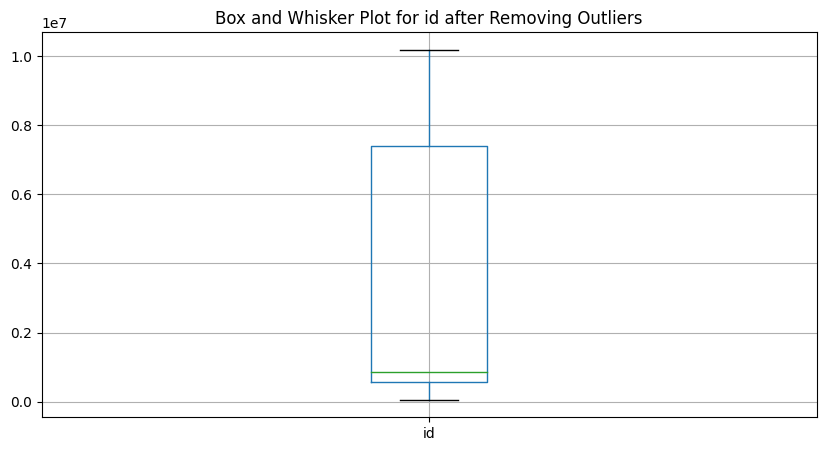

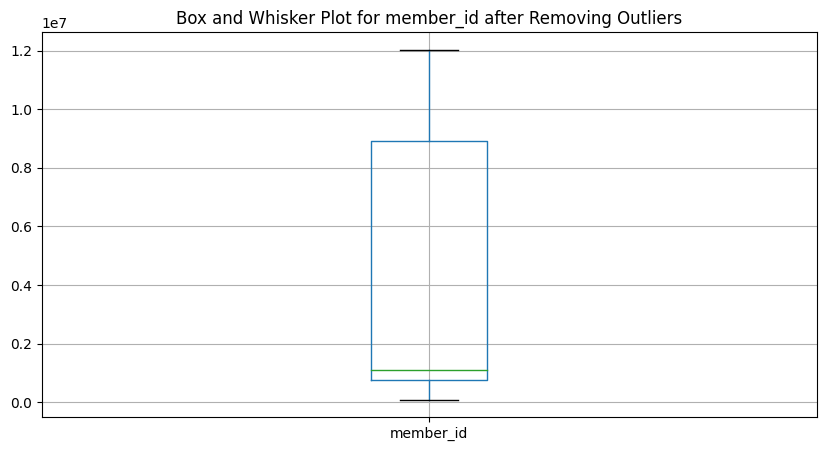

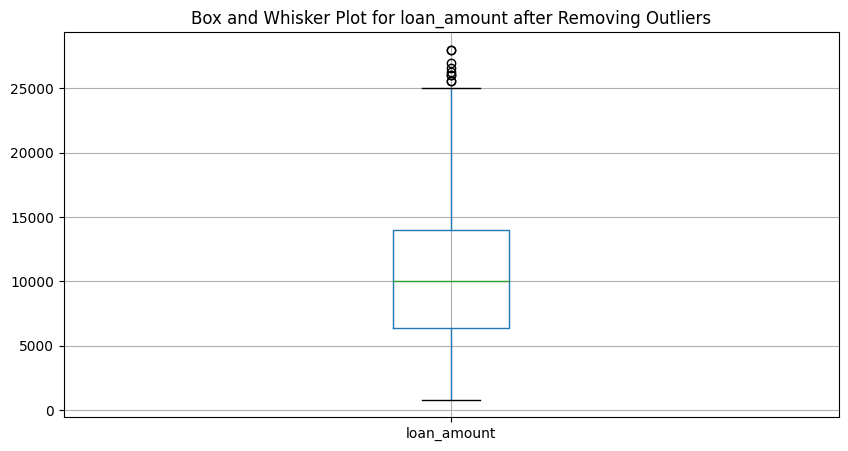

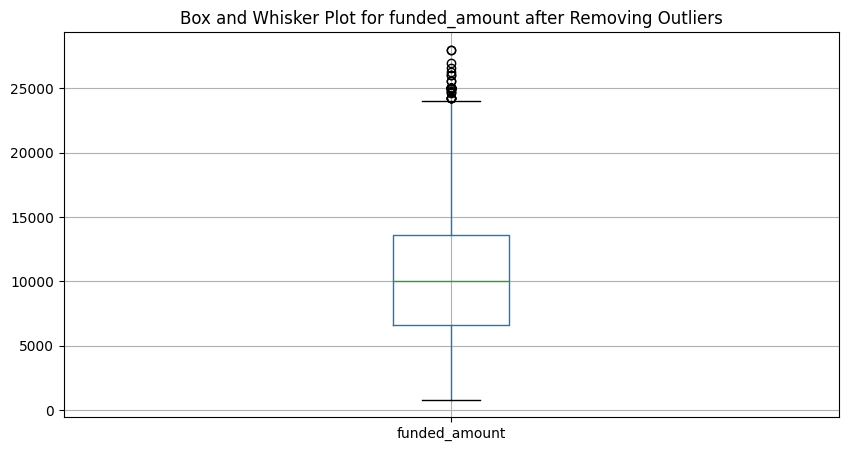

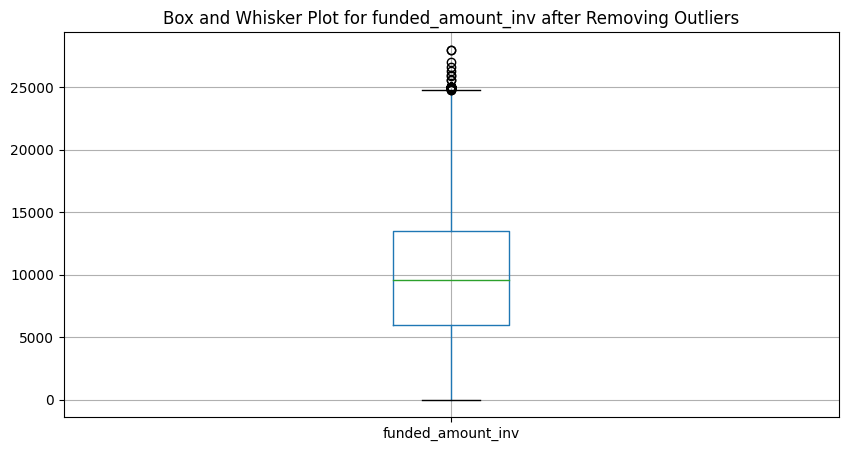

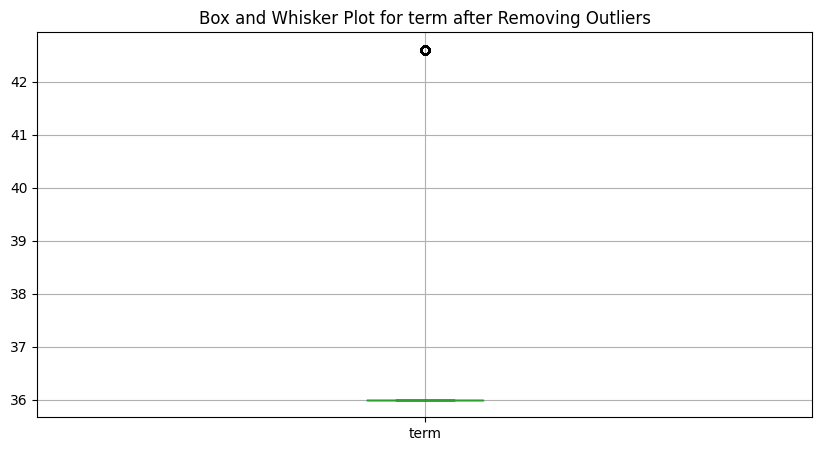

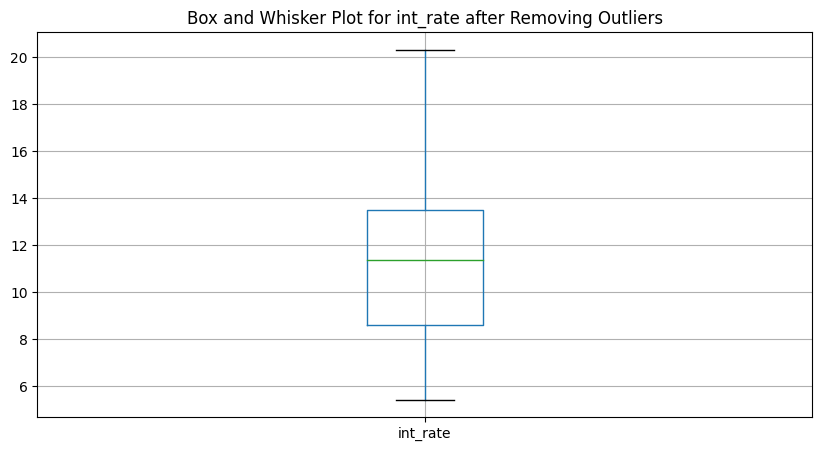

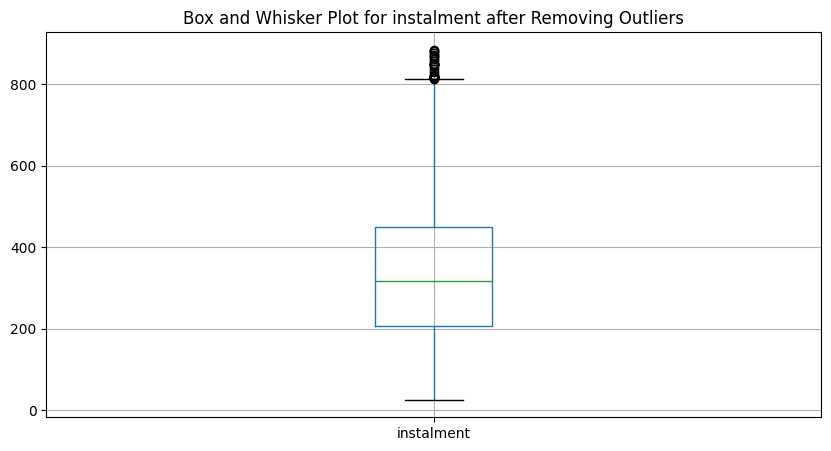

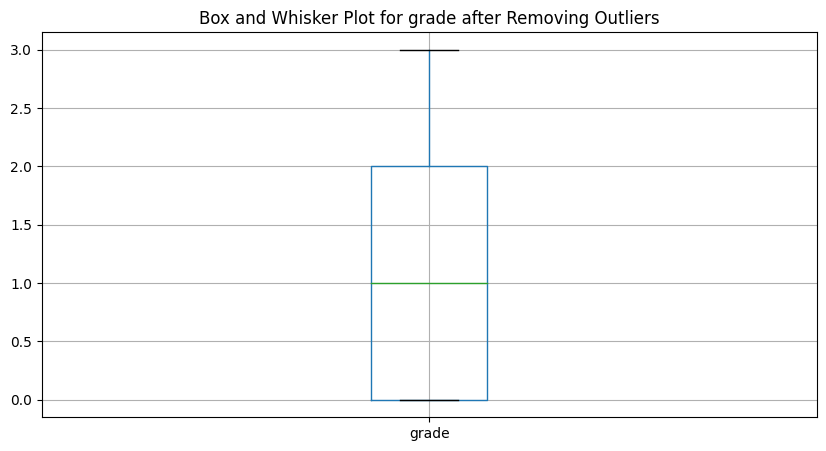

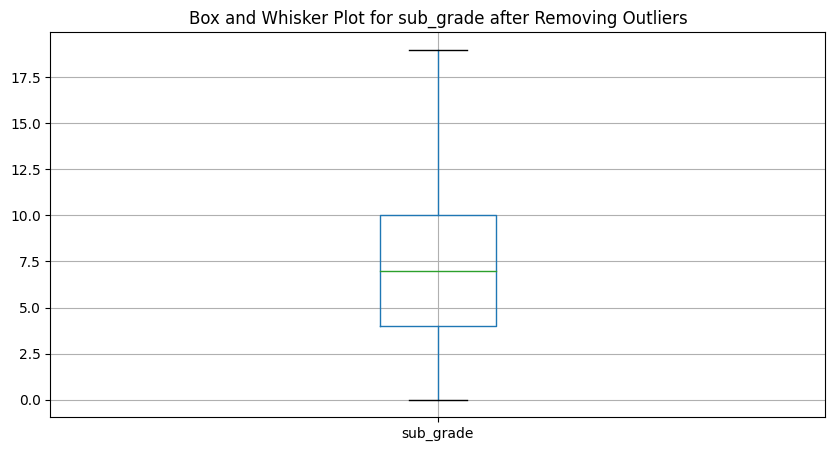

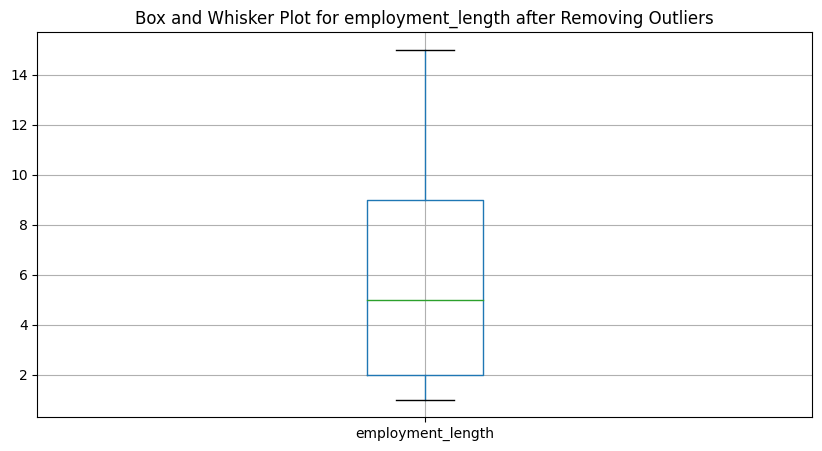

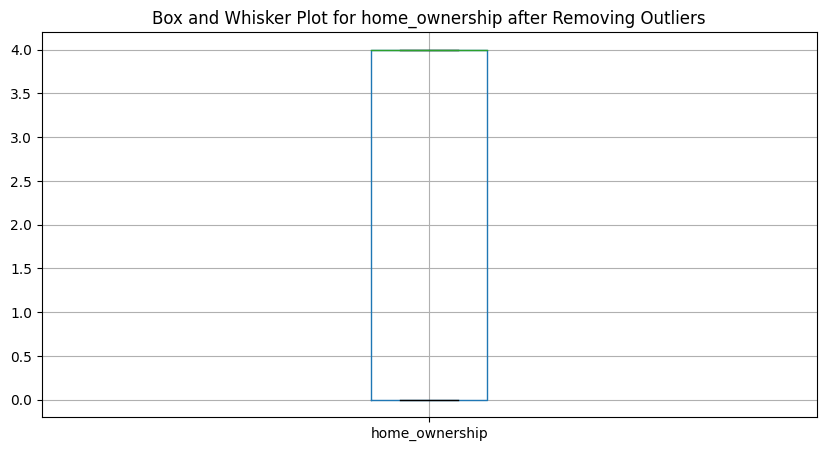

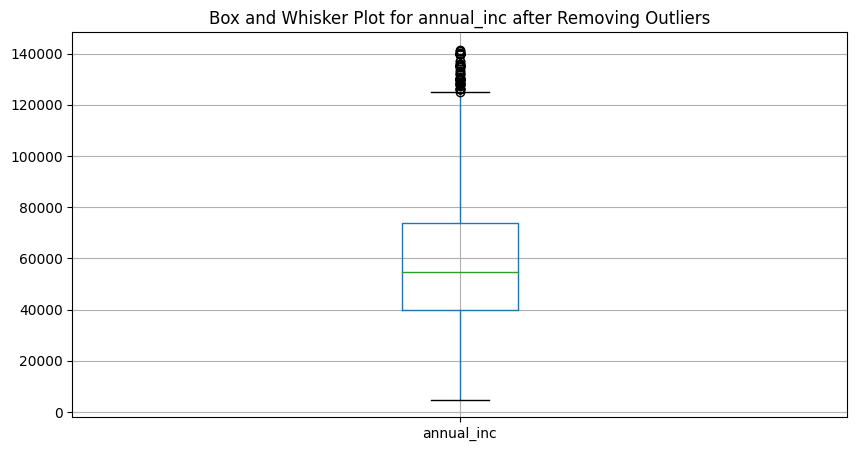

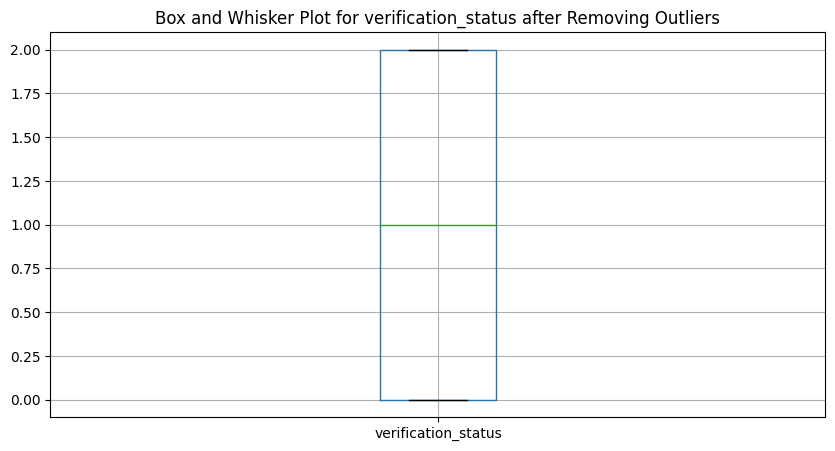

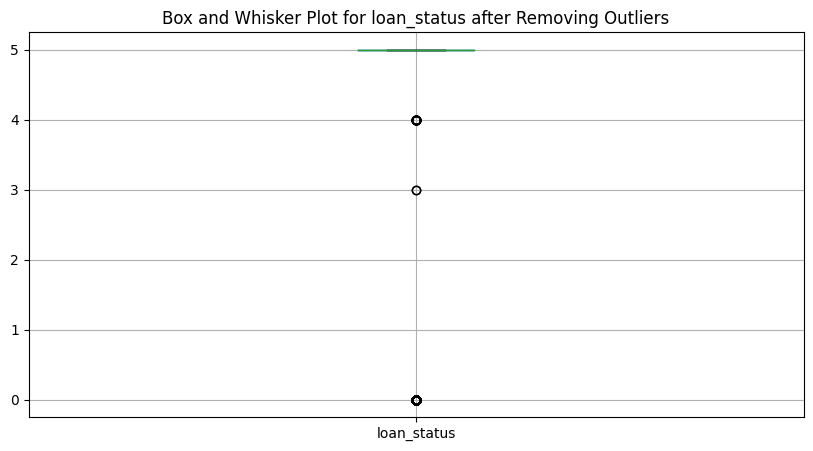

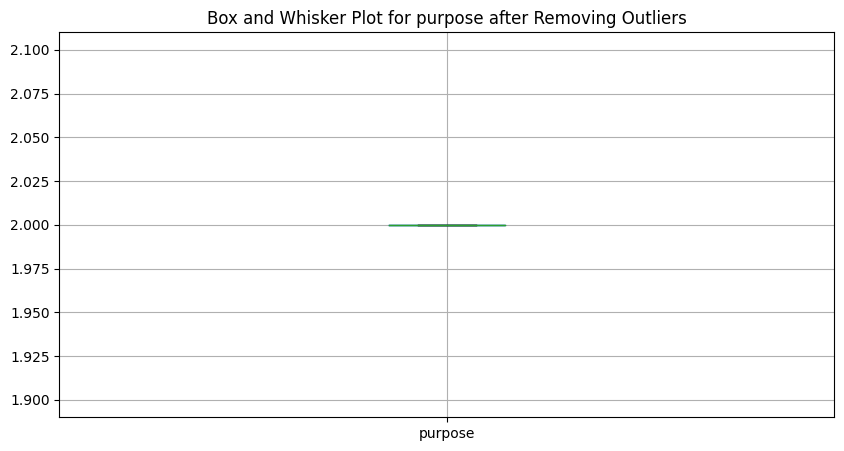

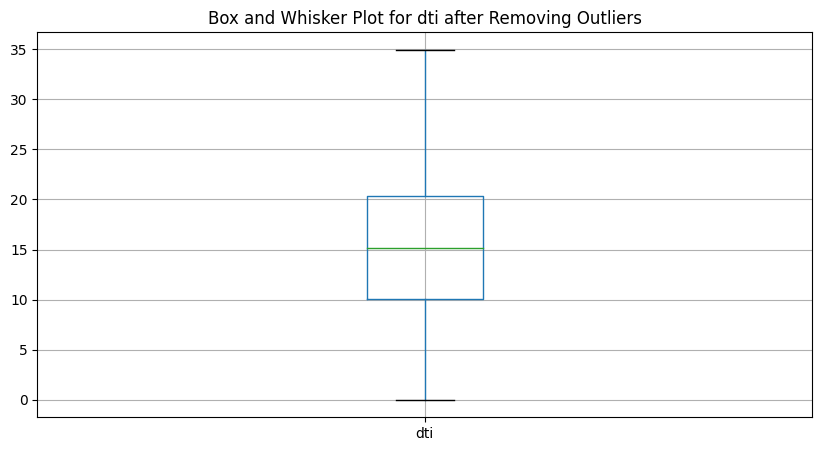

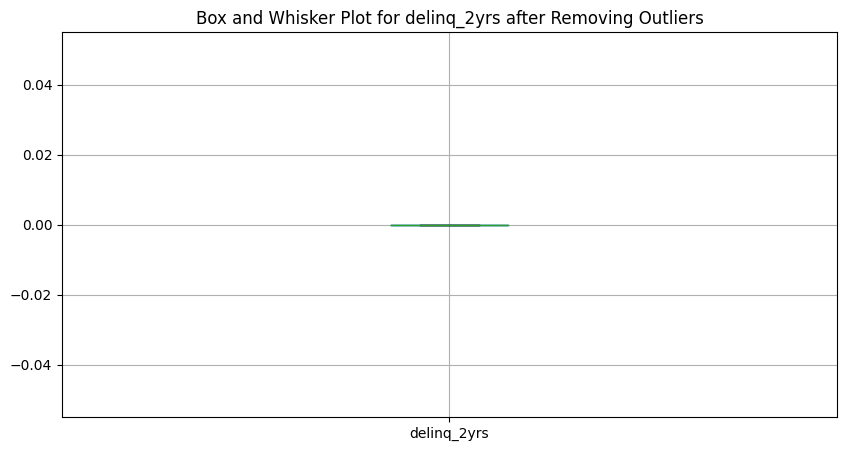

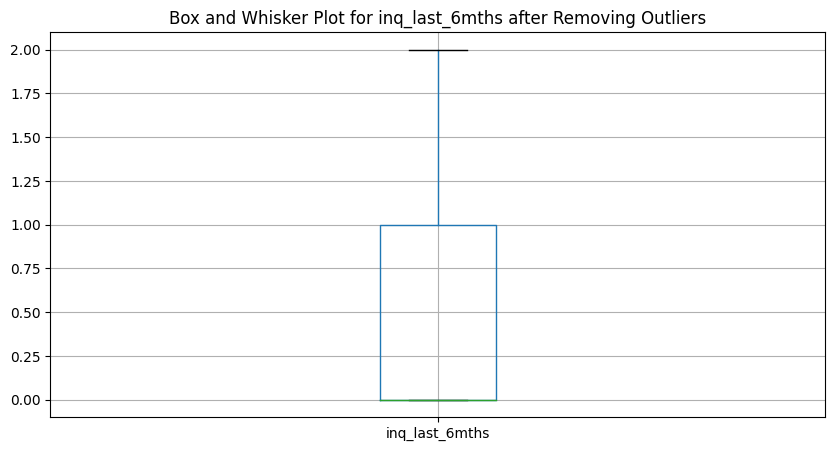

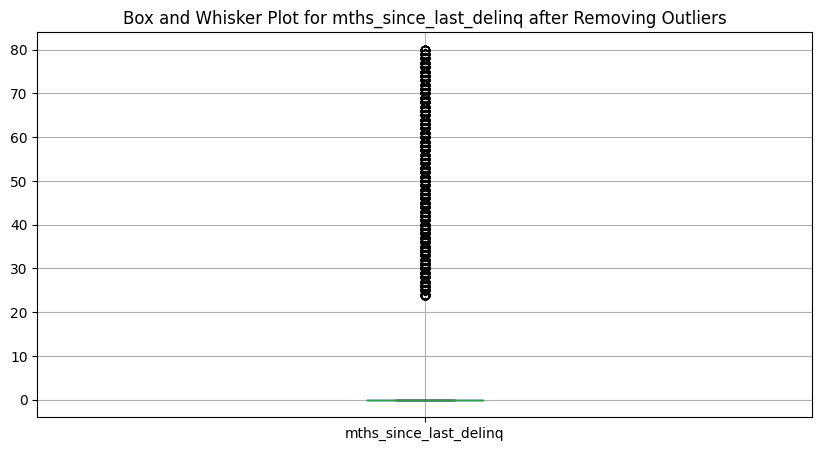

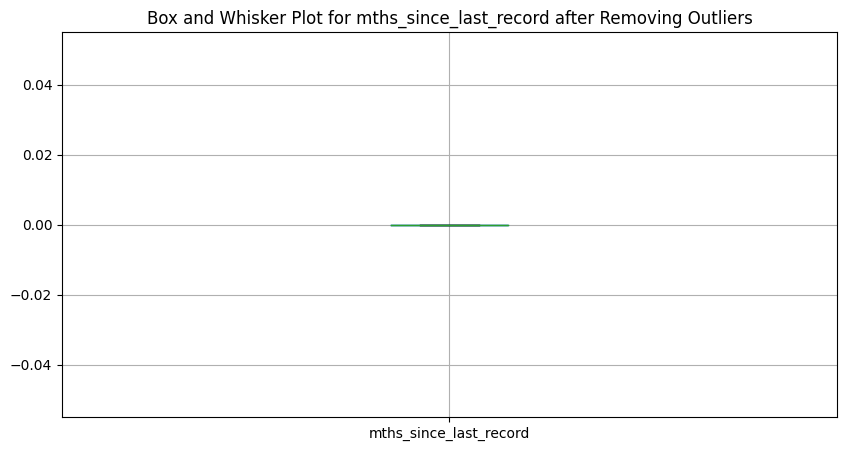

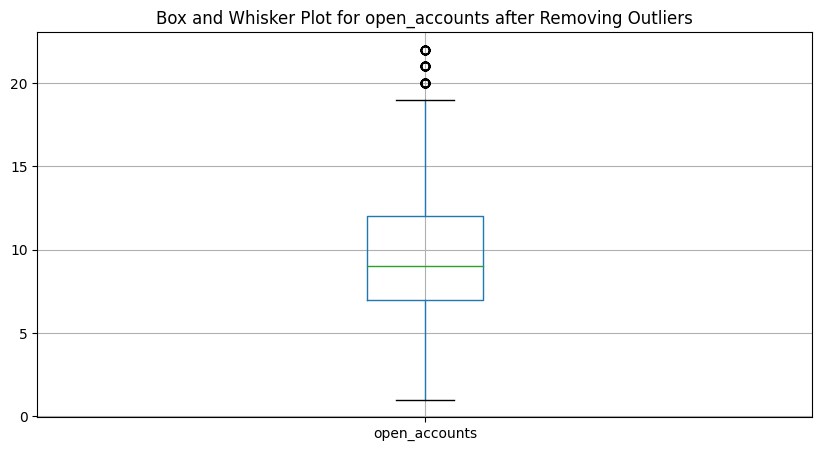

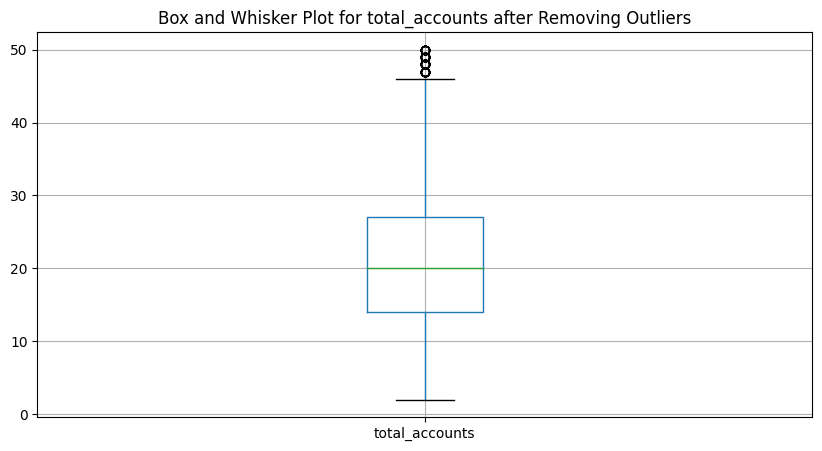

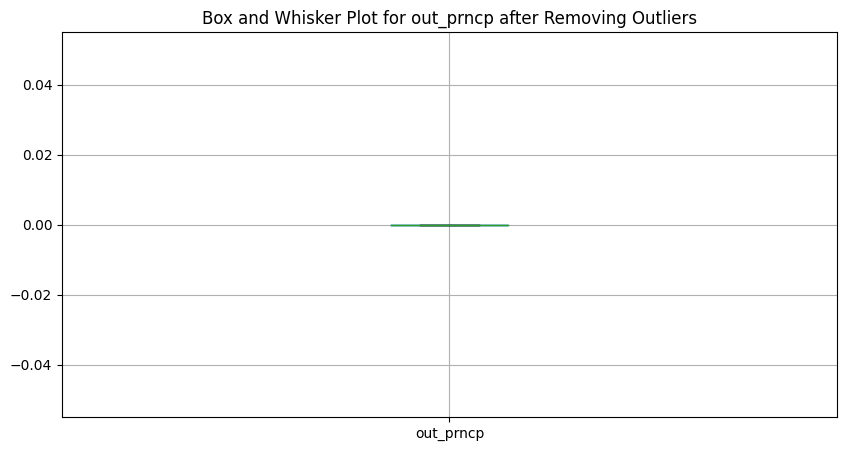

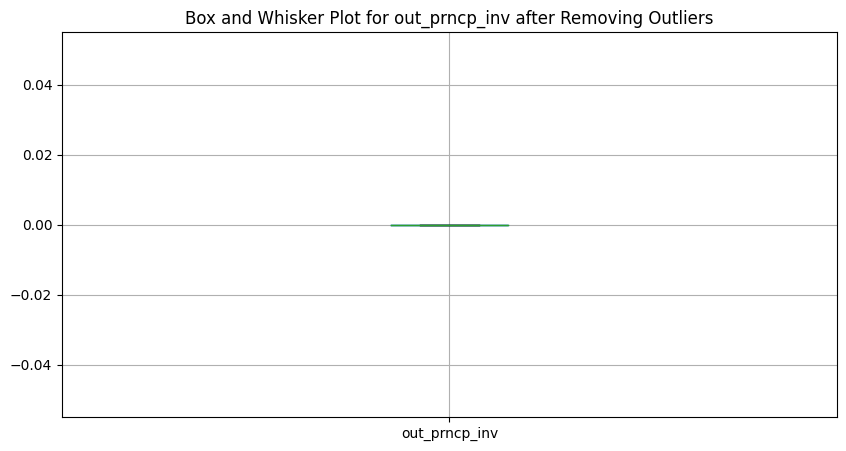

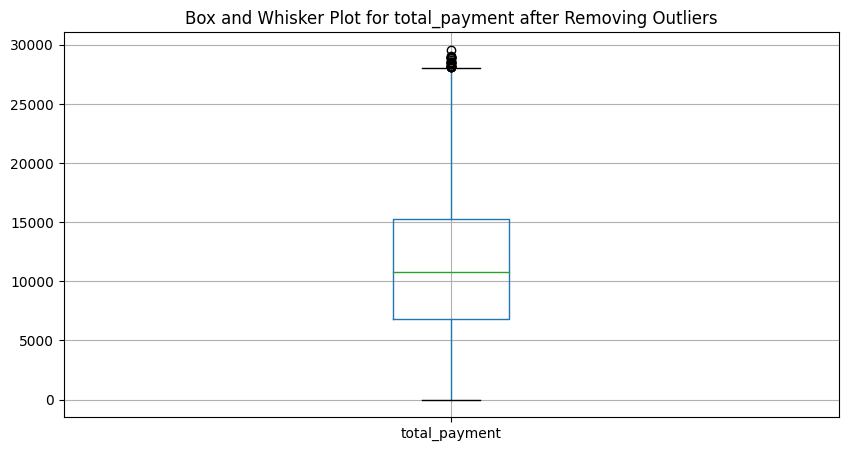

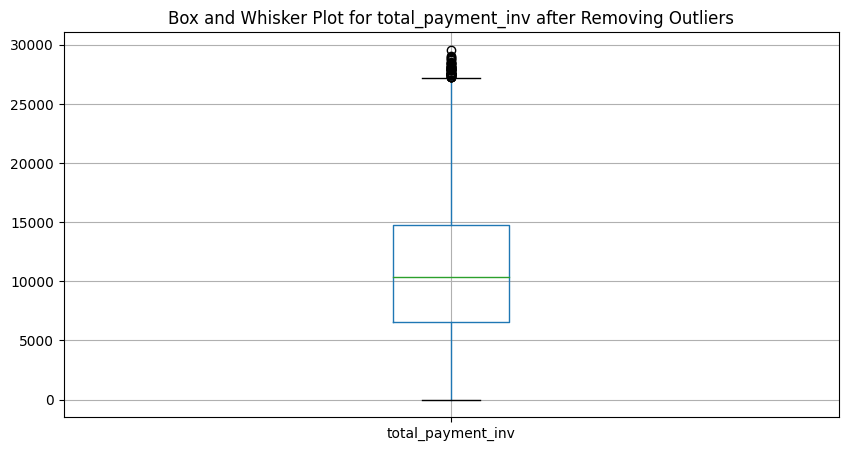

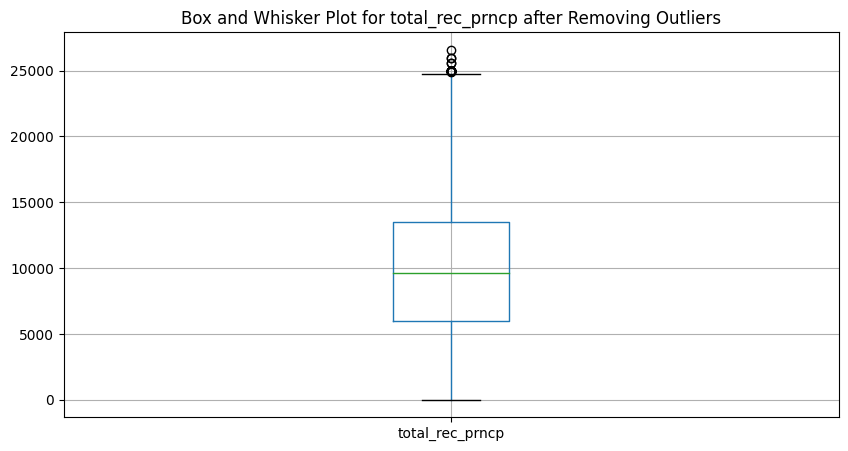

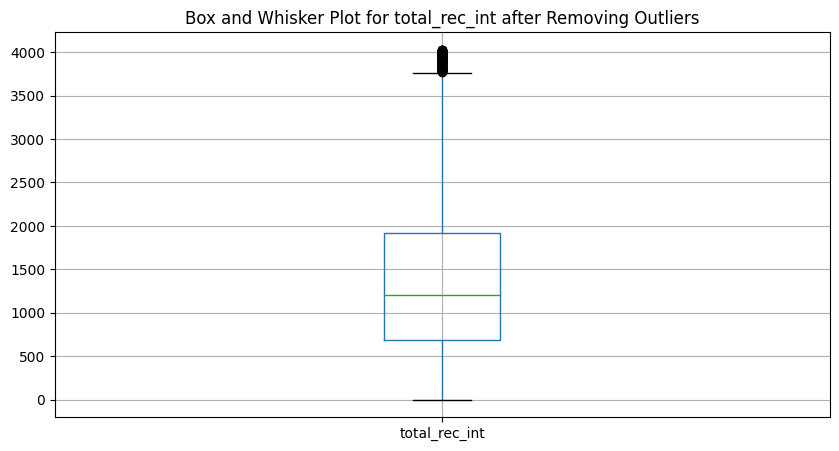

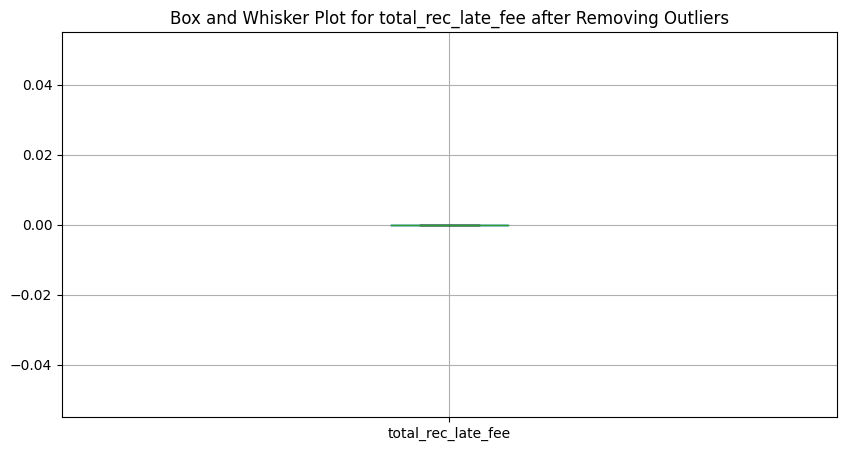

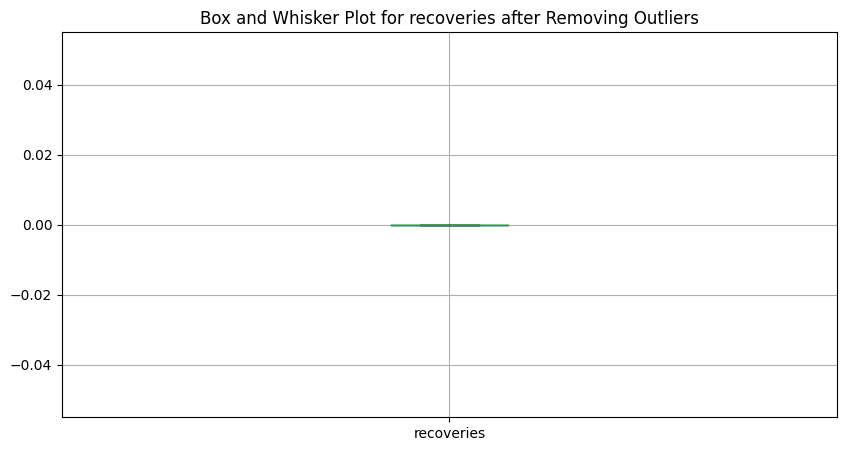

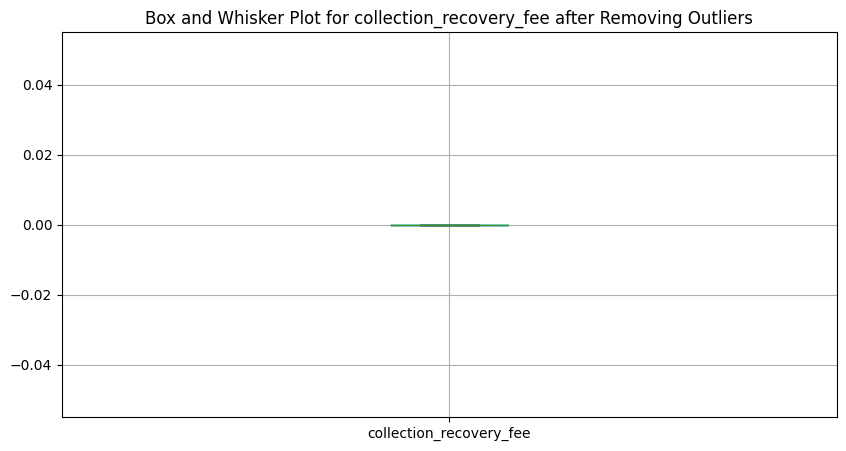

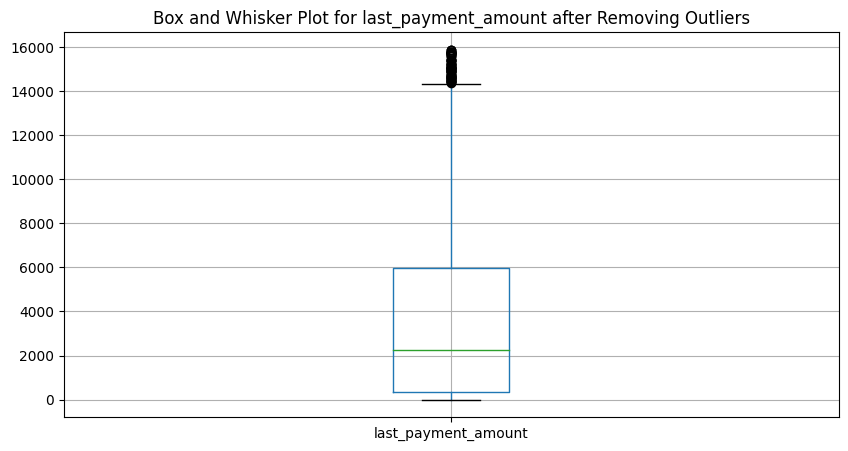

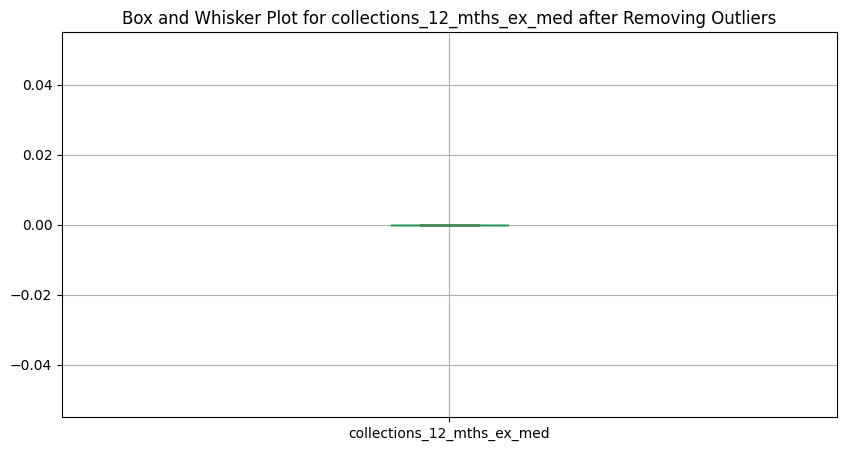

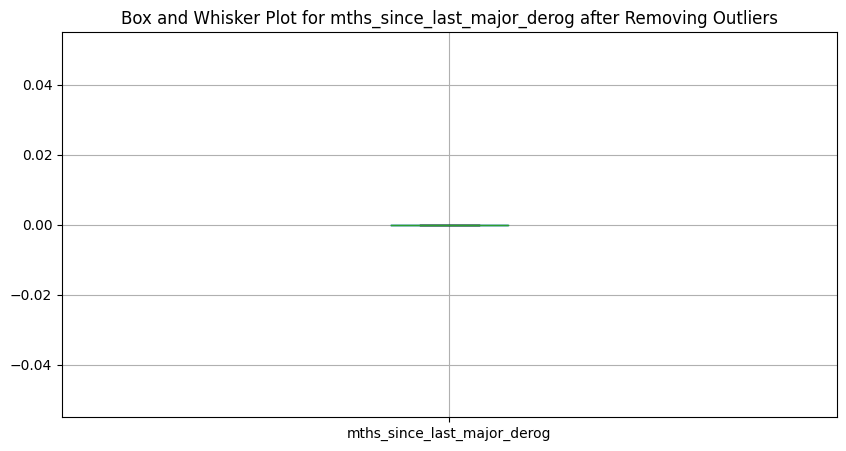

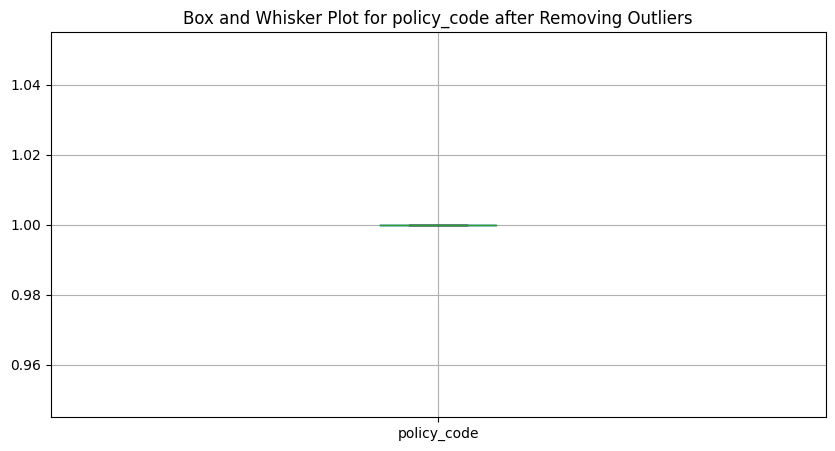

In [5]:
# Instantiate the Plotter class with the updated DataFrame without outliers
plotter_no_outliers = Plotter(df_no_outliers)

# Plot the box and whisker plots for the specified columns after removing outliers
print("\nVisualizing outliers after removal...")
plotter_no_outliers.plot_box_plots(df_no_outliers, title_prefix="After Removing Outliers")

# Plot the box and whisker plots using matplotlib for each numerical column separately
print("\nVisualizing outliers with matplotlib after removal...")
numerical_columns = df_no_outliers.select_dtypes(include=['number']).columns
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    df_no_outliers.boxplot(column=column)
    plt.title(f"Box and Whisker Plot for {column} after Removing Outliers")
    plt.show()

## Results Summary

### High Impact Removals (>500 outliers)
1. `total_rec_late_fee`: 1,630 outliers removed
   - Highest number of outliers
   - Indicates highly skewed late fee distribution
   - Mostly extreme high values

2. `annual_inc`: 1,118 outliers removed
   - Second highest
   - Suggests significant income disparities
   - Likely very high income borrowers

### Moderate Impact Removals (100-500 outliers)
1. `total_rec_int`: 395 outliers removed
2. `total_payment`: 223 outliers removed
3. `last_payment_amount`: 166 outliers removed
4. `funded_amount_inv`: 155 outliers removed
5. `total_payment_inv`: 125 outliers removed
6. `int_rate`: 93 outliers removed

### Low Impact Removals (<100 outliers)
1. `instalment`: 35 outliers removed
2. `loan_amount`: 6 outliers removed

### No Outliers Detected
- `funded_amount`
- `dti`
- `out_prncp`
- `out_prncp_inv`

## Key Findings

1. **Payment-Related Features**
   - Late fees show extreme outlier patterns
   - Interest and payment amounts have moderate outliers
   - Principal-related features show more regular distributions

2. **Income and Loan Features**
   - Annual income has significant outliers (high-income borrowers)
   - Loan amounts show surprisingly few outliers
   - DTI (Debt-to-Income) shows no outliers, suggesting effective screening

3. **Pattern Analysis**
   - Investment-related features (`funded_amount_inv`, `total_payment_inv`) show consistent outlier patterns
   - Interest rates have moderate number of outliers
   - Principal balances (`out_prncp`, `out_prncp_inv`) show no outliers

## Implications and Recommendations

1. **For Modeling**
   - Consider separate models for different income brackets
   - Use robust scaling for features with many outliers
   - Validate model performance with and without outlier removal

2. **For Business Understanding**
   - Investigate high late fee cases
   - Analyze high-income borrower patterns
   - Review interest rate outliers for policy implications

3. **For Data Processing**
   - Document outlier thresholds for future reference
   - Consider different outlier strategies for different feature types
   - Monitor impact of outlier removal on model performance

## Step 7: Save Cleaned DataFrame
We save the cleaned DataFrame for future use:
- `df.to_csv('plotter_no_outliers.csv')`: Saves the cleaned dataset to a new CSV file.
- This ensures that we can reuse the cleaned data in subsequent analysis steps without needing to repeat the outlier removal process.

In [6]:
# Save a cleaned copy of the DataFrame for further analysis
df.to_csv("b_df_5_plotter_IQR.csv", index=False)
print("The transformed DataFrame has been saved as 'b_df_5_plotter_IQR.csv'")

The transformed DataFrame has been saved as 'b_df_5_plotter_IQR.csv'
